In [2]:
### Project Evaluation Phase 3
print("**************************************")
print(" \033[1m" + "Flip Robo Project Evaluation Phase 3" + "\033[0m")
print("**************************************")
print("  OLUWAJOBA FATOLA  \n  Flip Robo Technology Internship")
print("\n")

**************************************
 Flip Robo Project Evaluation Phase 3
**************************************
  OLUWAJOBA FATOLA  
  Flip Robo Technology Internship




In [3]:
print("---------------------------------\n")
print("\033[1m" + " Zomato Restaurant Data Analysis\n" + "\033[0m")
print("---------------------------------\n")

---------------------------------

 Zomato Restaurant Data Analysis

---------------------------------



# Data Processing 

## Loading Libraries

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # basic visualization libraries
from IPython.display import display
import qgrid
%matplotlib inline
from matplotlib  import style
import seaborn as sns #clean columns 
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, mean_squared_error, recall_score, precision_score, roc_auc_score, make_scorer, accuracy_score, plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, mean_absolute_error, r2_score, explained_variance_score, max_error, classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_predict
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFECV, f_regression, RFE
from scipy.stats import mannwhitneyu
import dataframe_image as dfi
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, RandomOverSampler
import skillsnetwork
from scipy.stats import norm
from scipy import stats
from scipy.stats.mstats import winsorize
from tensorflow.keras.models import Sequential
import warnings


## Loading Dataset

In [5]:
# Load datasets
country_df = pd.read_excel('Country-Code.xlsx')  # Load .xlsx file
zomato_df = pd.read_csv('Zomato.csv', encoding='latin-1')  # Load .csv file

In [6]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


In [7]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
# Merge datasets on a common key
merged_df = pd.merge(zomato_df, country_df, on='Country Code')

# Preprocessing and Cleaning

## About the Data

In [9]:
# Display basic information about the dataset
merged_df.info()

# Display the first few rows of the dataset
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


### Handling Missing Values

In [10]:
# Check for missing values in the merged_df DataFrame
missing_values = merged_df.isnull().sum()

# Calculate the percentage of missing values with 4 decimal places
percentage_missing = (missing_values / len(merged_df)) * 100
percentage_missing = percentage_missing.round(4)  # Round to 4 decimal places

# Create a DataFrame to display the results
missing_data_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage Missing': percentage_missing})

# Display the DataFrame with missing value information
missing_data_df


,Missing Values,Percentage Missing
Restaurant ID,0,0.0000
Restaurant Name,0,0.0000
Country Code,0,0.0000
City,0,0.0000
Address,0,0.0000
Locality,0,0.0000
Locality Verbose,0,0.0000
Longitude,0,0.0000
Latitude,0,0.0000
Cuisines,9,0.0942


In [11]:
# Drop rows with missing "Cuisines" values
merged_df.dropna(subset=['Cuisines'], inplace=True)

# Verify that the rows have been dropped
print("Rows with missing 'Cuisines' values have been dropped.")


Rows with missing 'Cuisines' values have been dropped.


In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu 

## Exploratory Data Analysis

In [13]:
# Summary statistics
summary_stats = merged_df.describe()
summary_stats

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


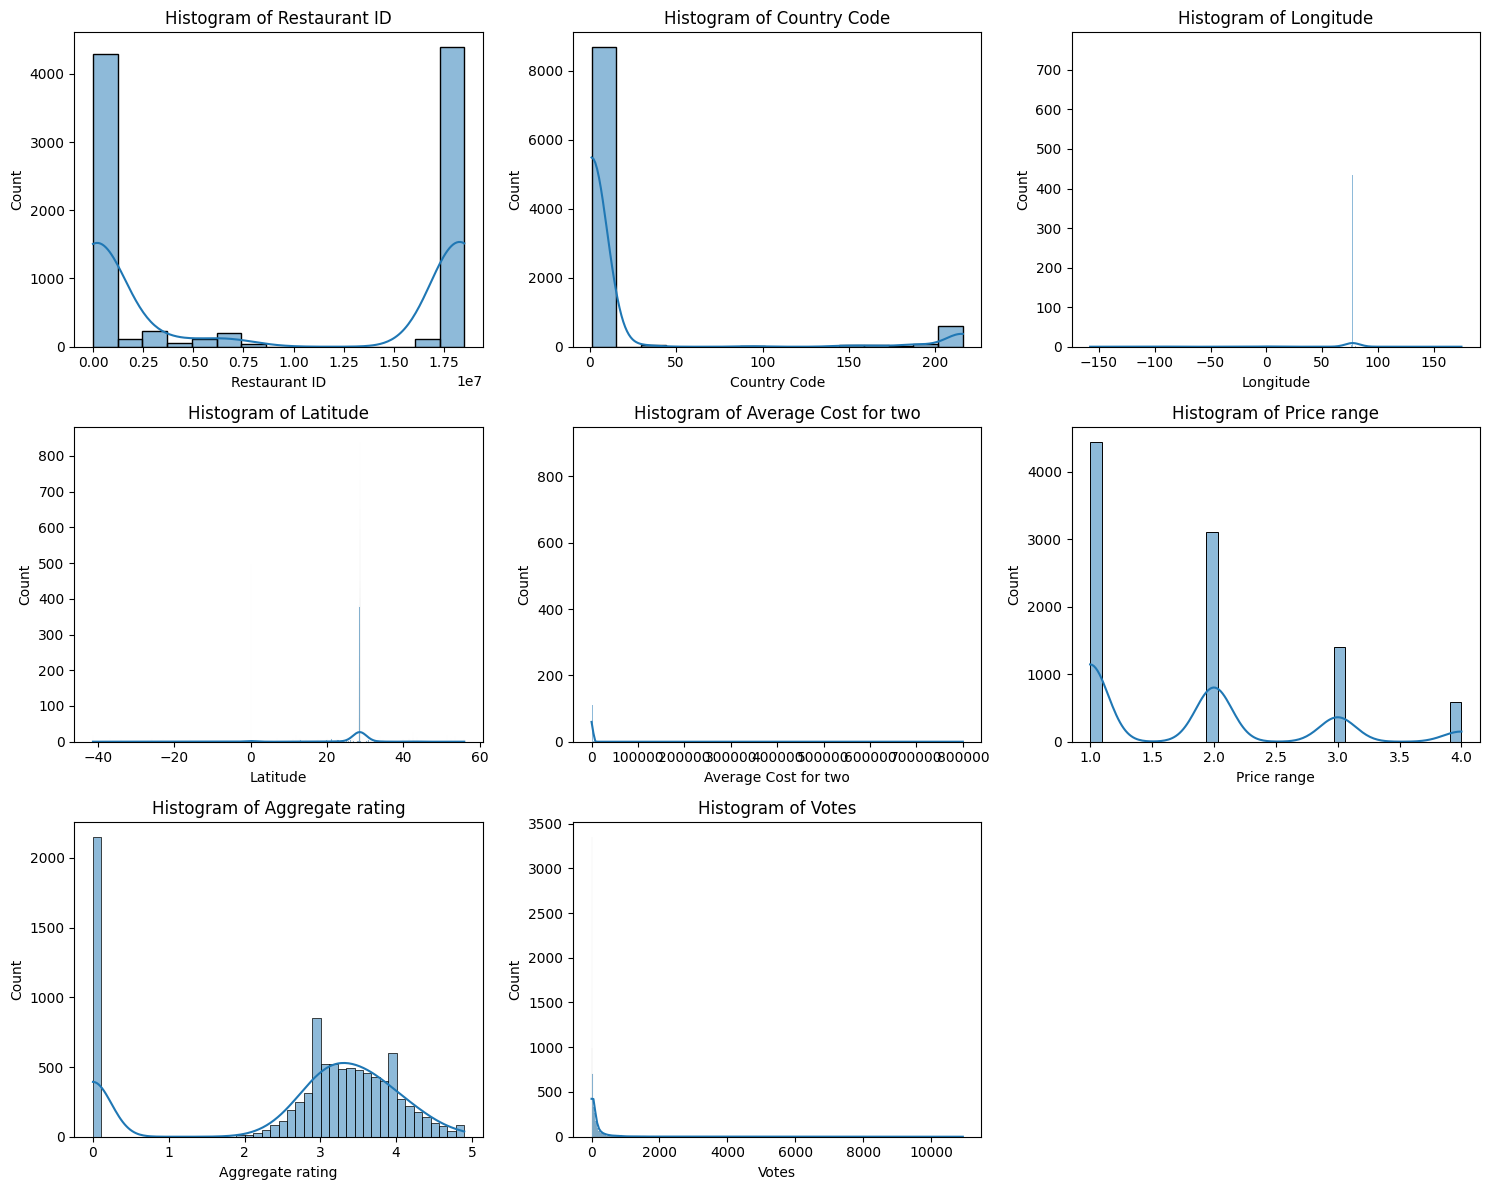

In [14]:
# Select the numeric and categorical features
numeric_features = merged_df.select_dtypes(include=['int64', 'float64'])
categorical_features = merged_df.select_dtypes(include=['object'])

num_cols = 3


# Create histograms of the numeric features
num_features = numeric_features.columns
num_features_count = len(num_features)
num_rows = num_features_count // num_cols + 1  # Calculate the number of rows needed

plt.figure(figsize=(15, 12))
for i, column in enumerate(num_features):
    plt.subplot(num_rows, num_cols, i+1)
    sns.histplot(merged_df[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Show all plots at the end of the code
plt.tight_layout()
plt.show()

In [16]:
categorical_columns = categorical_features.select_dtypes(include=['object']).columns
print("Categorical Columns:")
for column in categorical_columns:
    print(column)


Categorical Columns:
Restaurant Name
City
Address
Locality
Locality Verbose
Cuisines
Currency
Has Table booking
Has Online delivery
Is delivering now
Switch to order menu
Rating color
Rating text
Country


In [17]:
for column in categorical_features.columns:
    unique_values = merged_df[column].unique()
    print(f"Unique values for '{column}':")
    print(unique_values)
    print("\n")


Unique values for 'Restaurant Name':
['Le Petit Souffle' 'Izakaya Kikufuji' 'Heat - Edsa Shangri-La' ...
 'Huqqa' 'A\x81ô\x81ôk Kahve' "Walter's Coffee Roastery"]


Unique values for 'City':
['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Brasí_lia'
 'Rio de Janeiro' 'Sí£o Paulo' 'Albany' 'Athens' 'Augusta' 'Boise'
 'Cedar Rapids/Iowa City' 'Clatskanie' 'Cochrane' 'Columbus' 'Dalton'
 'Davenport' 'Des Moines' 'Dubuque' 'Fernley' 'Gainesville' 'Lakeview'
 'Lincoln' 'Macon' 'Mc Millan' 'Monroe' 'Ojo Caliente' 'Orlando'
 'Pensacola' 'Pocatello' 'Potrero' 'Princeton' 'Rest of Hawaii' 'Savannah'
 'Sioux City' 'Tampa Bay' 'Valdosta' 'Vernonia' 'Waterloo' 'Weirton'
 'Winchester Bay' 'Armidale' 'Balingup' 'Beechworth' 'Dicky Beach'
 'East Ballina' 'Flaxton' 'Forrest' 'Hepburn Springs' 'Huskisson'
 'Inverloch' 'Lakes Entrance' 'Lorn' 'Macedon' 'Mayfield'
 'Middleton Beach' 'Montville' 'Palm Cove' 'Paynesville

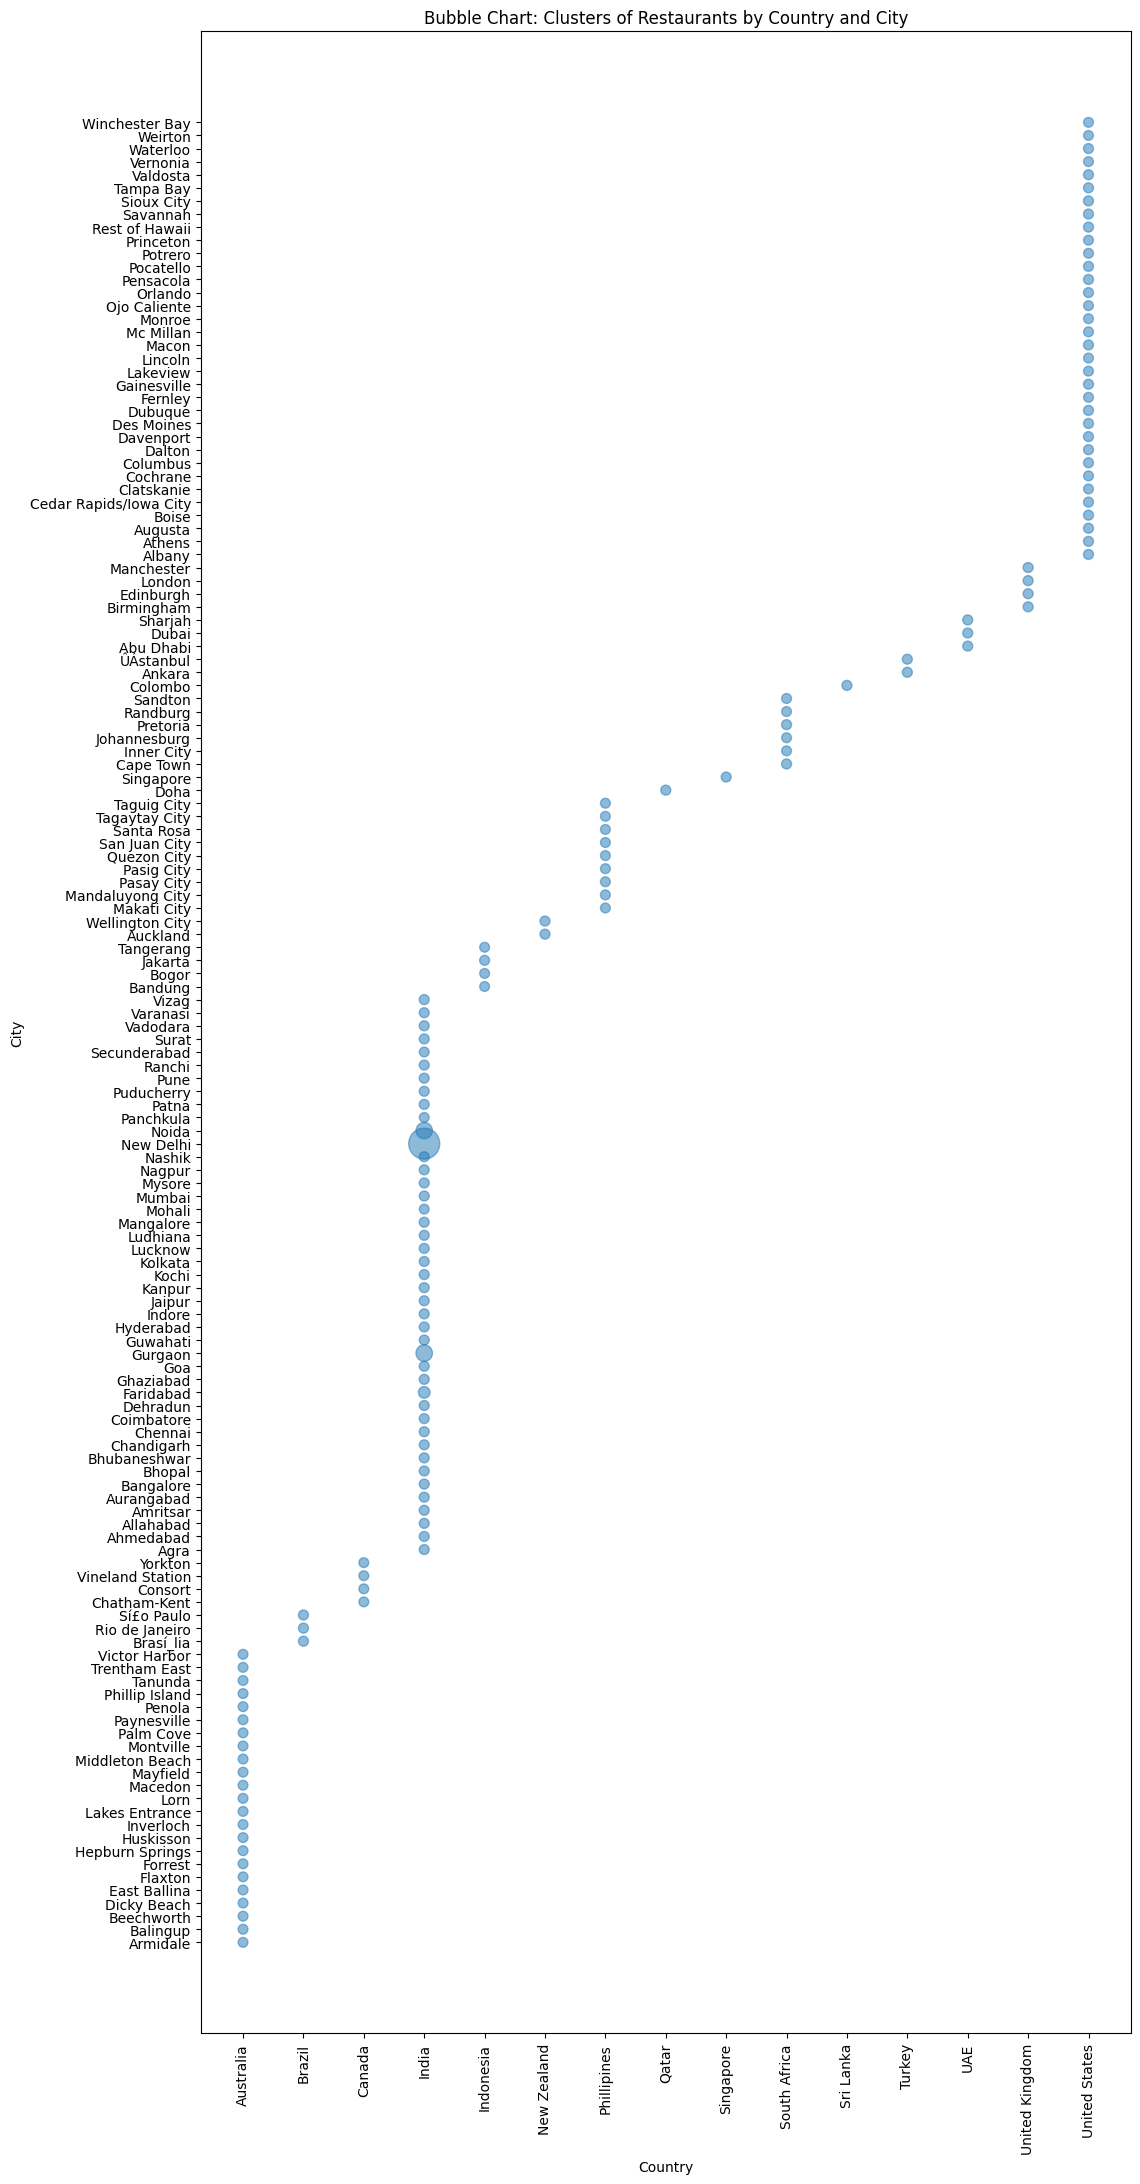

In [18]:

# Define your data for the bubble chart
countries = merged_df['Country']
cities = merged_df['City']

# Count the occurrences of each Country-City combination
cluster_data = merged_df.groupby(['Country', 'City']).size().reset_index(name='Count')

# Scale the 'Count' values for bubble size
min_size = 50  # Minimum bubble size
max_size = 500  # Maximum bubble size
cluster_data['Size'] = min_size + (cluster_data['Count'] - cluster_data['Count'].min()) / (cluster_data['Count'].max() - cluster_data['Count'].min()) * (max_size - min_size)

# Create a bubble chart using cluster_data for x, y, and bubble size
plt.figure(figsize=(12, 26))
plt.scatter(cluster_data['Country'], cluster_data['City'], s=cluster_data['Size'], alpha=0.5)
plt.xlabel('Country')
plt.ylabel('City')
plt.title('Bubble Chart: Clusters of Restaurants by Country and City')
plt.xticks(rotation=90)
plt.show()


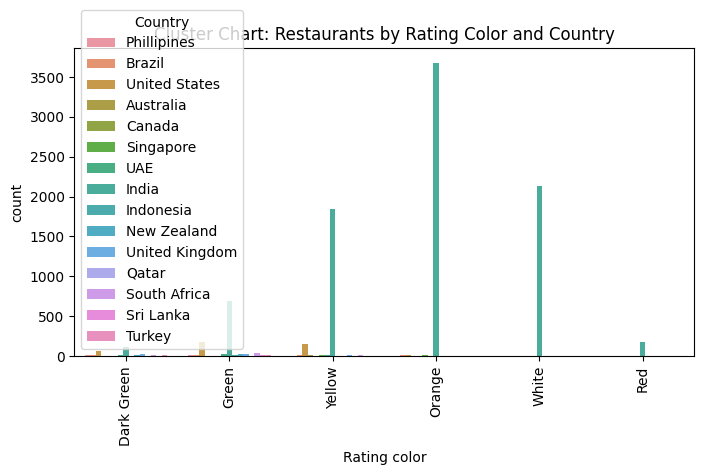

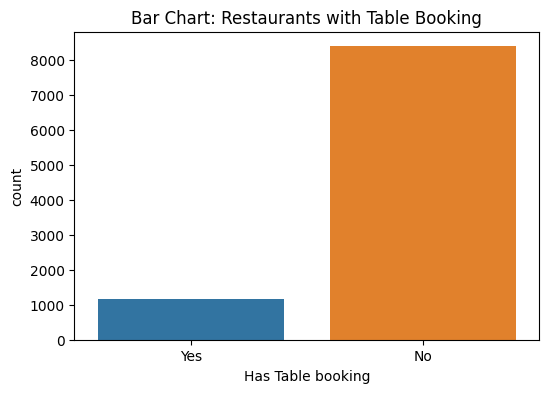

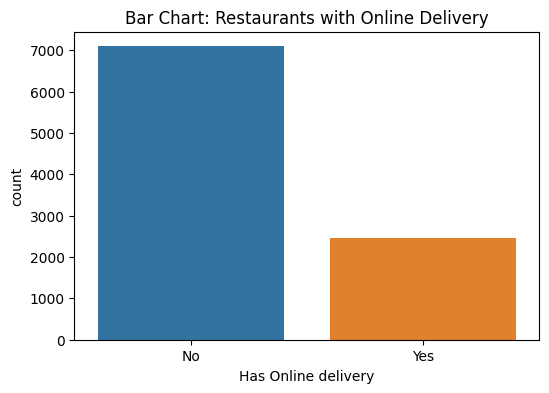

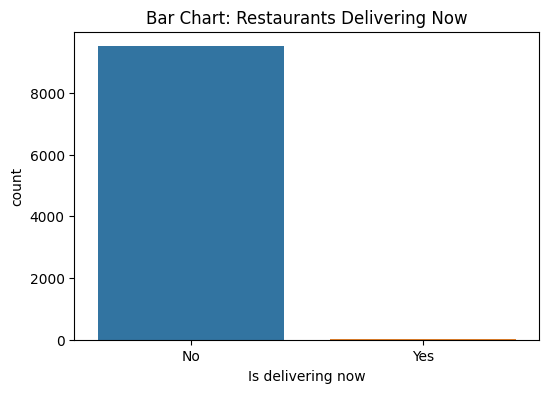

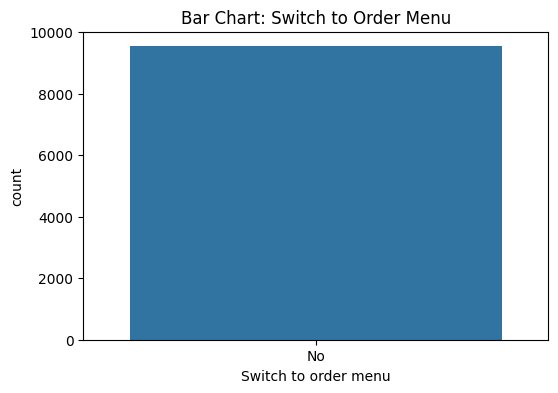

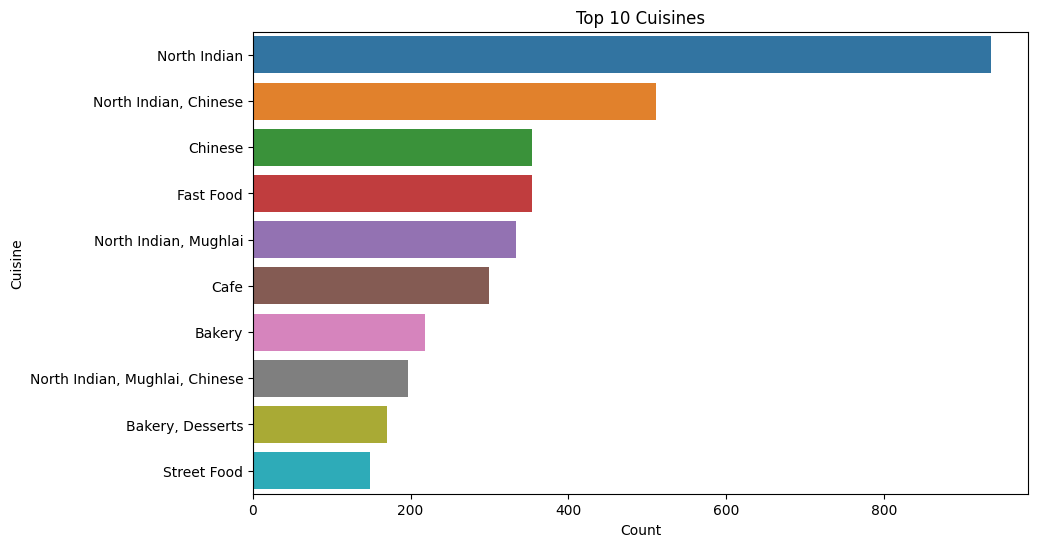

C:\Users\JOBA\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


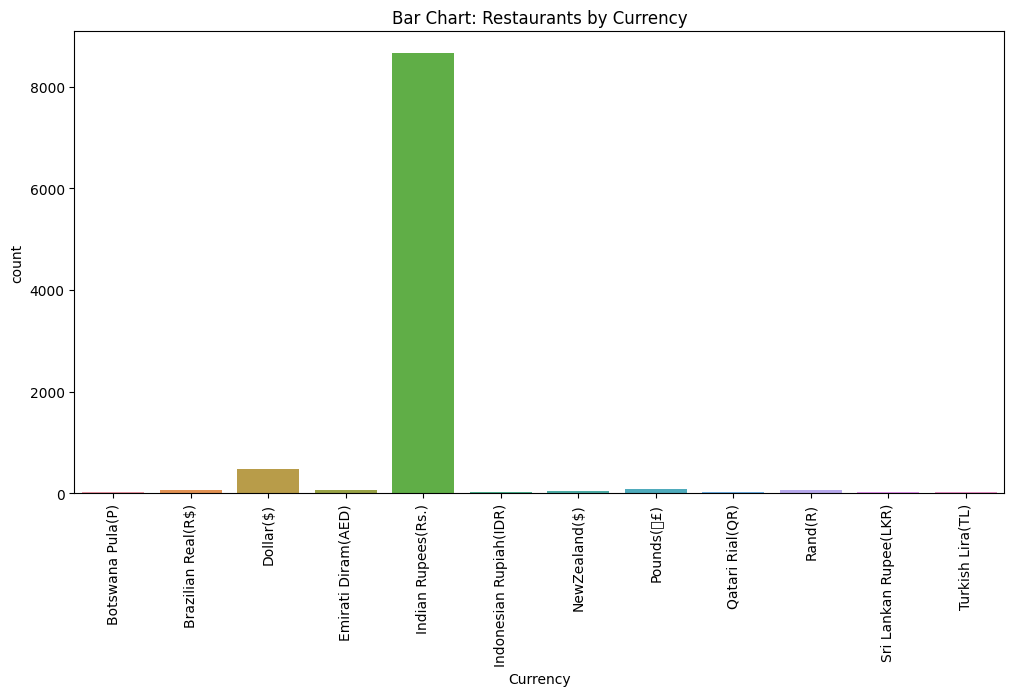

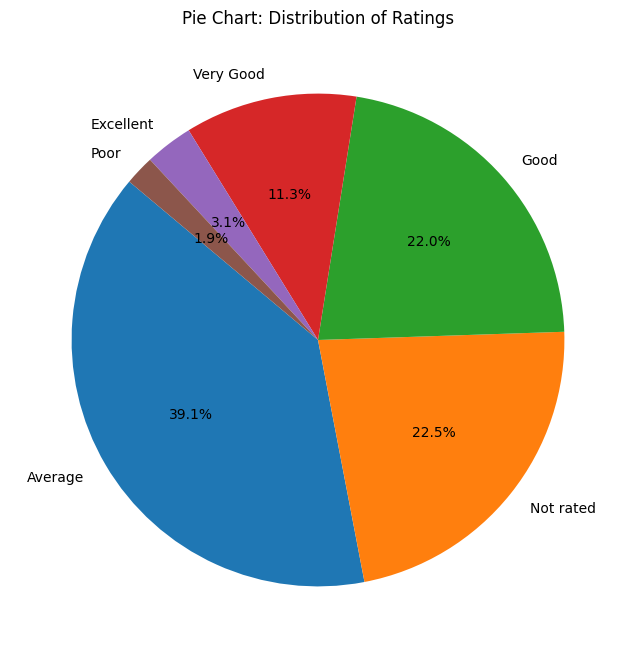

In [19]:
# Cluster Chart for 'Rating color'
plt.figure(figsize=(8, 4))
sns.countplot(data=merged_df, x='Rating color', hue='Country')
plt.xticks(rotation=90)
plt.title('Cluster Chart: Restaurants by Rating Color and Country')
plt.show()

# Bar Chart for 'Has Table booking'
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='Has Table booking')
plt.title('Bar Chart: Restaurants with Table Booking')
plt.show()

# Bar Chart for 'Has Online delivery'
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='Has Online delivery')
plt.title('Bar Chart: Restaurants with Online Delivery')
plt.show()

# Bar Chart for 'Is delivering now'
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='Is delivering now')
plt.title('Bar Chart: Restaurants Delivering Now')
plt.show()

# Bar Chart for 'Switch to order menu'
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='Switch to order menu')
plt.title('Bar Chart: Switch to Order Menu')
plt.show()

# Horizontal Bar Chart for 'Cuisines' (top 10 cuisines)
top_cuisines = merged_df['Cuisines'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.title('Top 10 Cuisines')
plt.show()

# Bar Chart for 'Currency'
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='Currency')
plt.xticks(rotation=90)
plt.title('Bar Chart: Restaurants by Currency')
plt.show()

# Pie Chart for 'Rating text'
rating_text_counts = merged_df['Rating text'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(rating_text_counts, labels=rating_text_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart: Distribution of Ratings')
plt.show()


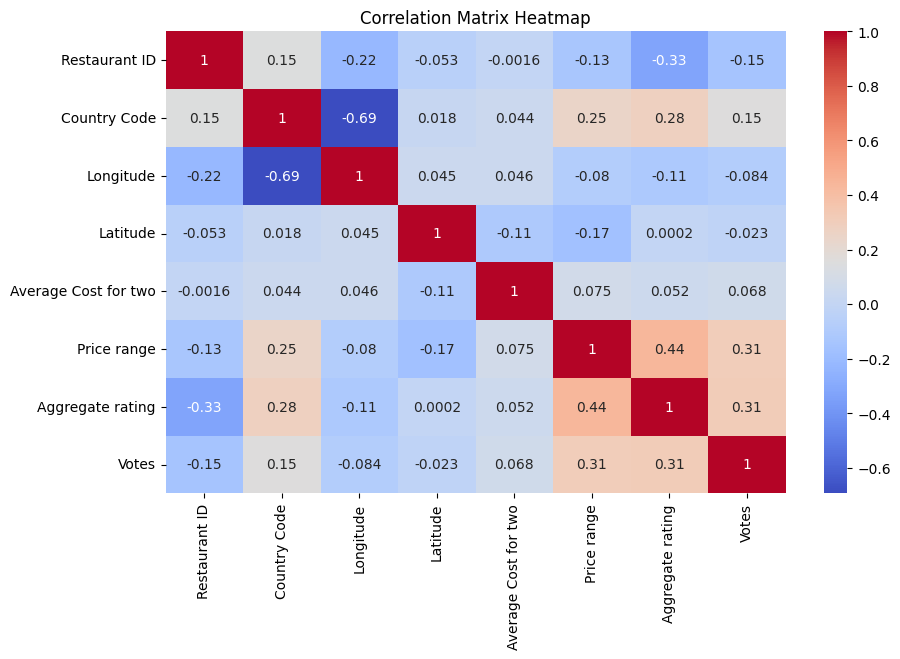

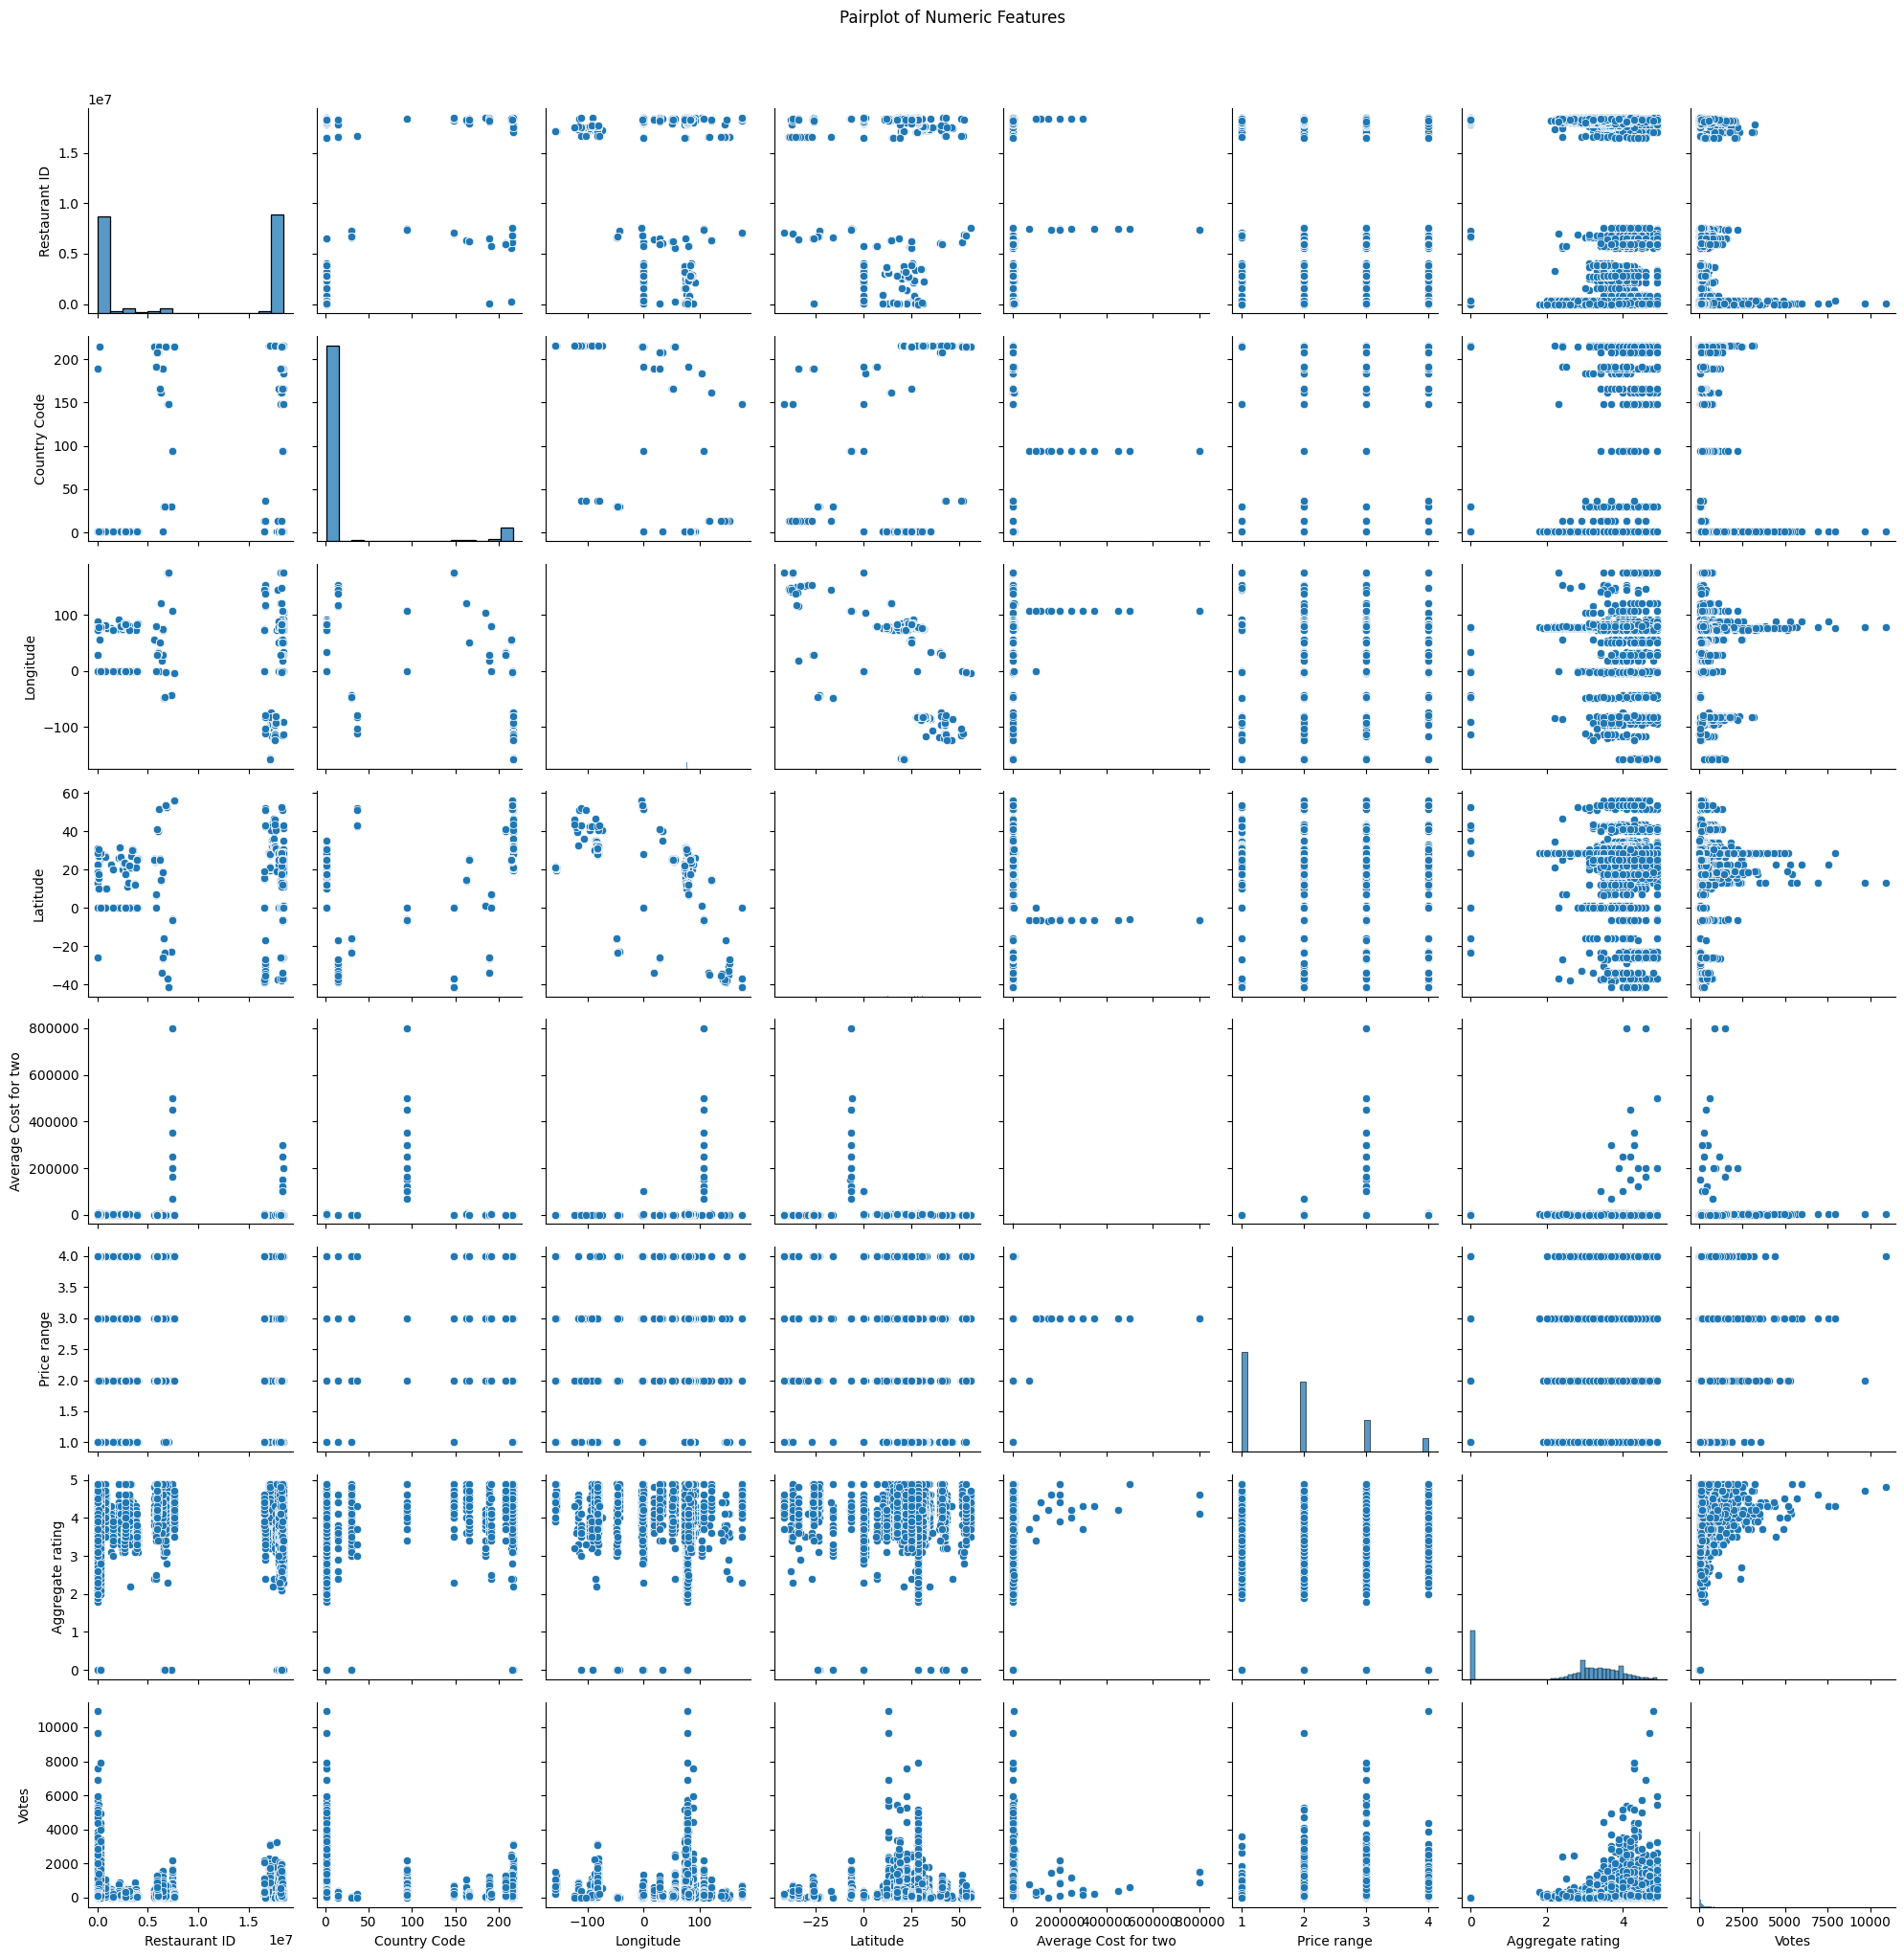

In [20]:
# Create a correlation matrix heatmap
correlation_matrix = merged_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")

# Create a pairplot for the numeric features
pairplot = sns.pairplot(merged_df[numeric_features.columns])
pairplot.fig.suptitle("Pairplot of Numeric Features", y=1.02)  

# Show all plots at the end of the code
plt.tight_layout()
plt.show()

The correlation matrix shows the correlation coefficients between various numerical features in the dataset. Here are some key insights from this correlation matrix:

1. **Restaurant ID**: There is very little correlation between Restaurant ID and other numeric features. This makes sense, as the restaurant ID is typically just a unique identifier and doesn't have a direct relationship with other restaurant characteristics.

2. **Country Code**: There is a moderately positive correlation between the Country Code and Price range, Aggregate rating, and Votes. This suggests that there may be some influence of the country code on these restaurant attributes. For example, restaurants in different countries might have different price ranges or ratings.

3. **Longitude and Latitude**: Longitude and Latitude have a slight positive correlation, indicating that they are related. However, they are not strongly correlated with other features, suggesting that the geographical coordinates of the restaurants don't have a strong direct impact on other attributes.

4. **Average Cost for two**: Average cost for two people dining at the restaurant shows a very weak correlation with most other features. It is not strongly related to Price range, Aggregate rating, or Votes.

5. **Price range**: Price range has a moderate positive correlation with Aggregate rating. This implies that restaurants with higher price ranges might receive better ratings. It also has a moderate correlation with Votes, which means that higher-priced restaurants tend to receive more votes.

6. **Aggregate rating**: Aggregate rating has a relatively strong positive correlation with both Price range and Votes. This suggests that restaurants with higher ratings tend to have higher price ranges and receive more votes, which is expected.

7. **Votes**: Votes also have a moderate positive correlation with Price range and Aggregate rating, implying that popular restaurants (those with more votes) tend to have higher price ranges and better ratings.


# Predicting "Average Cost for Two" (Regression)

For predicting the "Average Cost for Two," we'll use a regression model. Regression models are used for predicting numerical or continuous values, which is the case for predicting the cost.

In [21]:
# Make a copy of the merged data for regression Model
reg_df = merged_df.copy()

# Now, 'reg_df' is an independent copy of 'merged_df' for regression model 
# preserving the original merged data 


In [22]:
# Drop the 'Restaurant Name' column as it has a large number of unique values and is unlikely to be useful for prediction
# Since 'Rating color' is primarily a visual representation of the restaurant's rating and 
# lacks a meaningful quantitative interpretation, it's unlikely to be useful in predicting the average cost for two.

reg_df.drop(['Restaurant Name', 'Rating color'], axis=1, inplace=True)

In [23]:
# Encode categorical variables

# 1. One-Hot Encoding for 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines'
reg_df = pd.get_dummies(reg_df, columns=['City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines'])

# 2. Label Encoding for 'Currency'
currency_mapping = {
    'Botswana Pula(P)': 1,
    'Brazilian Real(R$)': 2,
    'Dollar($)': 3,
    'Emirati Diram(AED)': 4,
    'Indian Rupees(Rs.)': 5,
    'Indonesian Rupiah(IDR)': 6,
    'NewZealand($)': 7,
    'Pounds(\x8c£)': 8,
    'Qatari Rial(QR)': 9,
    'Rand(R)': 10,
    'Sri Lankan Rupee(LKR)': 11,
    'Turkish Lira(TL)': 12
}
reg_df['Currency'] = reg_df['Currency'].map(currency_mapping)

# 3. Label Encoding for binary variables
binary_mapping = {
    'Yes': 1,
    'No': 0
}
reg_df['Has Table booking'] = reg_df['Has Table booking'].map(binary_mapping)
reg_df['Has Online delivery'] = reg_df['Has Online delivery'].map(binary_mapping)
reg_df['Is delivering now'] = reg_df['Is delivering now'].map(binary_mapping)
reg_df['Switch to order menu'] = reg_df['Switch to order menu'].map(binary_mapping)

# 4. Mapping for 'Rating text'
rating_mapping = {
    'Excellent': 5,
    'Very Good': 4,
    'Good': 3,
    'Average': 2,
    'Not rated': 1,  
    'Poor': 1       
}
reg_df['Rating text'] = reg_df['Rating text'].map(rating_mapping)

# 5. One-Hot Encoding for 'Country'
reg_df = pd.get_dummies(reg_df, columns=['Country'])


In [24]:
# Define the features (independent variables)
features = reg_df.drop(['Average Cost for two'], axis=1)  # Remove the target variable

# Define the target variable
target = reg_df['Average Cost for two']

# Now 'features' contains all the columns except 'Average Cost for two',
# and 'target' contains the 'Average Cost for two' column.



## Checking Distribution of Target Variable  

In [25]:
target.describe()

count      9542.000000
mean       1200.326137
std       16128.743876
min           0.000000
25%         250.000000
50%         400.000000
75%         700.000000
max      800000.000000
Name: Average Cost for two, dtype: float64

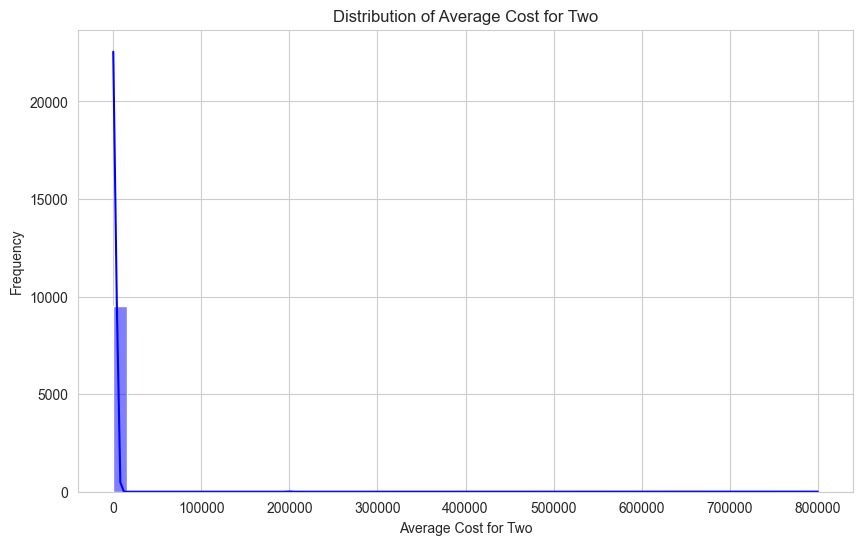

In [26]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a histogram (histplot) for the target variable
plt.figure(figsize=(10, 6))
sns.histplot(target, kde=True, bins=50, color='blue')
plt.title('Distribution of Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Frequency')
plt.show()


*Overall, the distribution of the **'Average Cost for Two'** variable has a wide range of values, with a **right-skewed distribution.** This means that there are relatively few high-cost restaurants that push the mean and maximum values higher, while the majority of restaurants have lower costs for two people.*

## Target Variable Transformation

A logarithmic transformation is often used when dealing with data that exhibits right-skewness or has a wide range of values, as in this case. This transformation can help make the data more symmetric and reduce the impact of extreme values, which can be beneficial for regression models.

In [27]:
# Apply a logarithmic transformation to the target variable

target = np.log1p(target)


In [28]:
target.describe()

count    9542.000000
mean        5.958077
std         1.079723
min         0.000000
25%         5.525453
50%         5.993961
75%         6.552508
max        13.592368
Name: Average Cost for two, dtype: float64

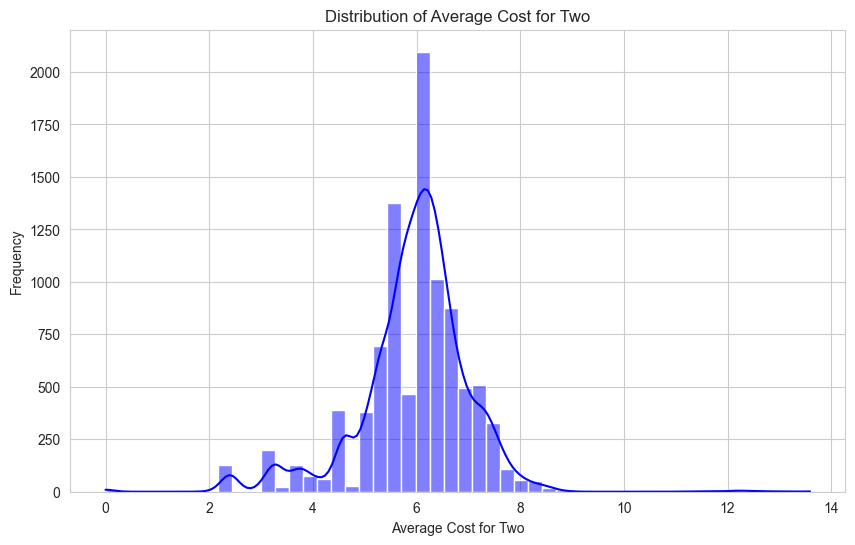

In [29]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a histogram (histplot) for the target variable
plt.figure(figsize=(10, 6))
sns.histplot(target, kde=True, bins=50, color='blue')
plt.title('Distribution of Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Frequency')
plt.show()


After applying a logarithmic transformation to the "Average Cost for two" target variable, we can see that the transformation has shifted the distribution and reduced the scale of the data, making it more suitable for regression analysis and predictive modelling.

# Data Splitting

In [30]:
# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# X_train and y_train will be the training data.
# X_test and y_test will be the testing data.


# Regression Task

In [35]:
# Create a DataFrame to store performance metrics
performance_df = pd.DataFrame(columns=['Model', 'Mean Squared Error', 'Mean Absolute Error', 'R-squared', 'Explained Variance'])

# Define a list of regression models, replacing SVR with Lasso Regression
from sklearn.linear_model import Lasso  # Import Lasso Regression

models = [
    ('Random Forest Regressor', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Lasso Regression', Lasso(alpha=0.01, random_state=42)),  # Include Lasso Regression with a regularization parameter (alpha)
    ('Gradient Boosting Regressor', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('Decision Tree Regressor', DecisionTreeRegressor(random_state=42))
]

# Iterate through the models, train, and evaluate them
for name, model in models:
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions on the test set
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    
    # Create a DataFrame with the current model's performance metrics
    model_df = pd.DataFrame({'Model': [name], 'Mean Squared Error': [mse], 'Mean Absolute Error': [mae], 'R-squared': [r2], 'Explained Variance': [evs]})
    
    # Concatenate the model_df with the performance_df
    performance_df = pd.concat([performance_df, model_df], ignore_index=True)

# Display the updated performance DataFrame with Lasso Regression
print("Model Performance Metrics:")
performance_df


Model Performance Metrics:


,Model,Mean Squared Error,Mean Absolute Error,R-squared,Explained Variance
0,Random Forest Regressor,0.103415,0.201504,0.913504,0.914019
1,Lasso Regression,0.281309,0.305686,0.764714,0.764794
2,Gradient Boosting Regressor,0.116926,0.235731,0.902203,0.902274
3,Decision Tree Regressor,0.148692,0.242631,0.875635,0.876325


The performance metrics for the different regression models are as follows:

1. **Random Forest Regressor**:
   - Mean Squared Error: 0.103415
   - Mean Absolute Error: 0.201504
   - R-squared: 0.913504
   - Explained Variance: 0.914019

   The Random Forest Regressor achieved very low Mean Squared Error and Mean Absolute Error, indicating a strong predictive performance. The high R-squared and Explained Variance values (close to 1) suggest that this model explains a large proportion of the variance in the target variable and fits the data very well.

2. **Lasso Regression**:
   - Mean Squared Error: 0.281309
   - Mean Absolute Error: 0.305686
   - R-squared: 0.764714
   - Explained Variance: 0.764794

   Lasso Regression performs reasonably well but has higher Mean Squared Error and Mean Absolute Error compared to Random Forest. The R-squared and Explained Variance are lower than Random Forest, indicating that this model explains less of the variance in the target variable.

3. **Gradient Boosting Regressor**:
   - Mean Squared Error: 0.116926
   - Mean Absolute Error: 0.235731
   - R-squared: 0.902203
   - Explained Variance: 0.902274

   The Gradient Boosting Regressor performs well with low Mean Squared Error and Mean Absolute Error. It has a high R-squared and Explained Variance, indicating good predictive performance and a strong fit to the data.

4. **Decision Tree Regressor**:
   - Mean Squared Error: 0.148692
   - Mean Absolute Error: 0.242631
   - R-squared: 0.875635
   - Explained Variance: 0.876325

   The Decision Tree Regressor shows good performance but slightly higher errors compared to Random Forest and Gradient Boosting. It also explains a significant portion of the variance in the target variable, as reflected by R-squared and Explained Variance.

In summary, the **Random Forest Regressor**appears to be the best-performing model among the four, with the lowest errors and the highest R-squared and Explained Variance. The Gradient Boosting Regressor is a close second, while Lasso Regression and Decision Tree Regressor also perform well but with slightly higher errors and lower explanatory power.

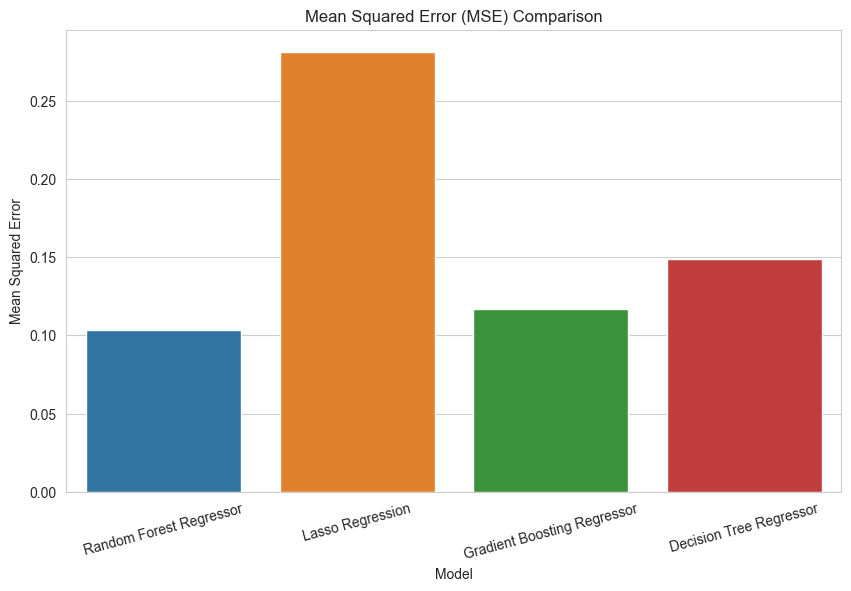

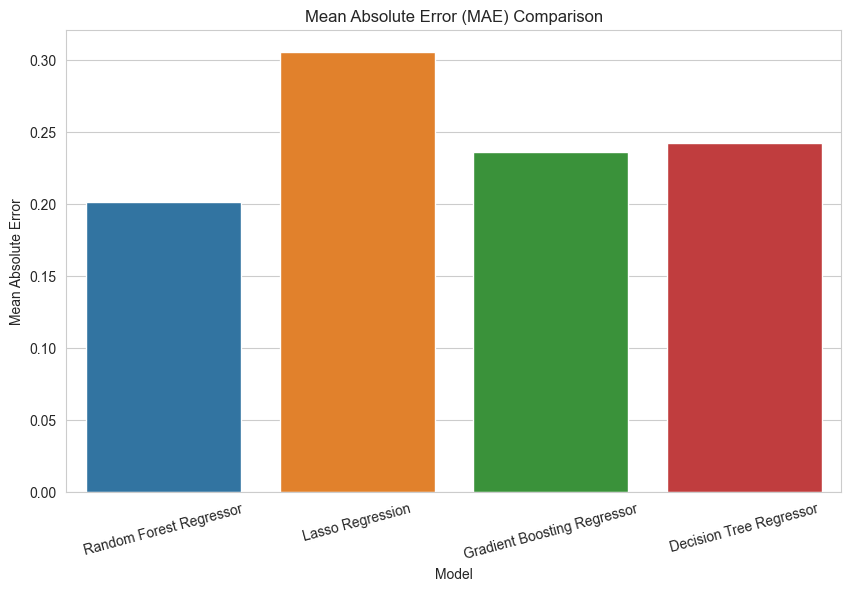

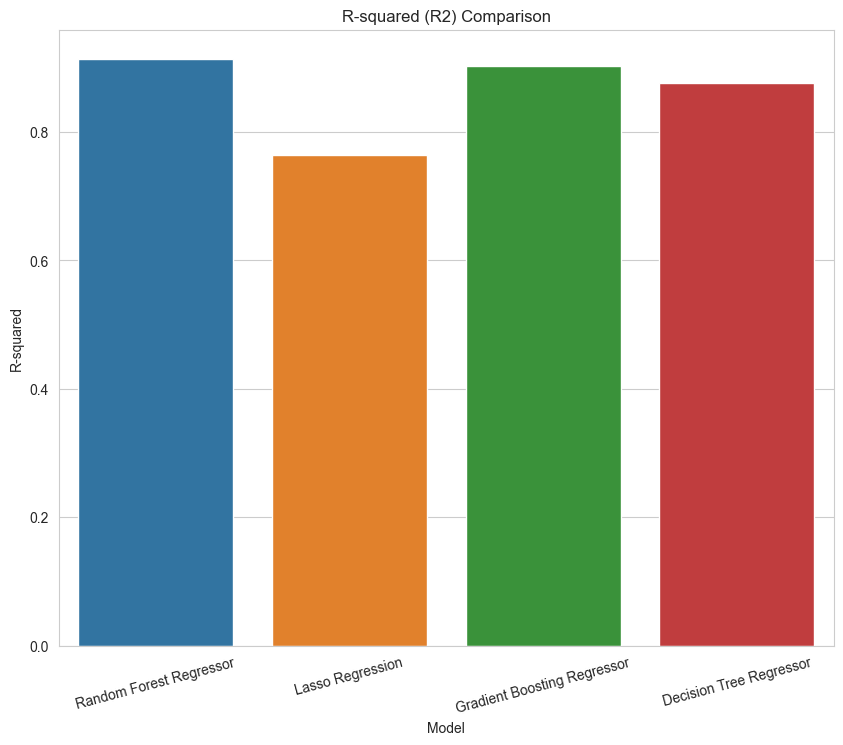

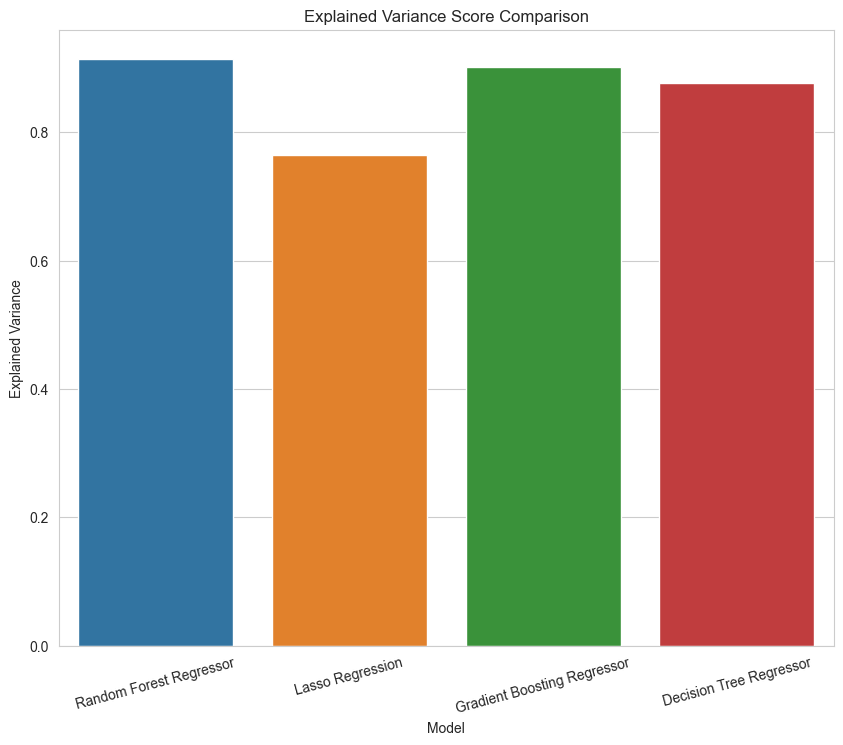

In [34]:
# Visualize the performance results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Mean Squared Error', data=performance_df)
plt.title('Mean Squared Error (MSE) Comparison')
plt.xticks(rotation=15)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Mean Absolute Error', data=performance_df)
plt.title('Mean Absolute Error (MAE) Comparison')
plt.xticks(rotation=15)
plt.show()

plt.figure(figsize=(10, 8))
sns.barplot(x='Model', y='R-squared', data=performance_df)
plt.title('R-squared (R2) Comparison')
plt.xticks(rotation=15)
plt.show()

plt.figure(figsize=(10, 8))
sns.barplot(x='Model', y='Explained Variance', data=performance_df)
plt.title('Explained Variance Score Comparison')
plt.xticks(rotation=15)
plt.show()

# Predicting the "Price Range" (Classification)

For predicting the "Price Range," we'll use a classification model. Classification models are used to categorize data into specific classes or categories. In this case, "Price Range" likely has a finite set of categories (e.g., low, medium, high), and you'll need a classification model to predict which category each restaurant falls into.

In [45]:
# Make a copy of the merged data for classification Model
class_df = merged_df.copy()

# Now, 'class_df' is an independent copy of 'merged_df' for classification model 
# preserving the original merged data 


In [46]:
class_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


### Drop Irrelevant Features 

Considering dropping certain features like 'Restaurant ID', 'Restaurant Name', 'Country Code', and geographic coordinates ('Longitude' and 'Latitude') for several reasons:

1. **Uniqueness**: 'Restaurant ID' and 'Restaurant Name' are likely to be unique identifiers for each restaurant. They do not contain meaningful information for predicting the price range and would not contribute to the model's performance.

2. **Geographic Coordinates**: 'Longitude' and 'Latitude' are specific geographic coordinates that pinpoint the location of the restaurant. While they can be important for location-based analysis, they might not directly correlate with the price range of a restaurant. The dataset may already include location-related features like 'City' and 'Locality' that could capture location information more effectively.

3. **Country Code**: If the dataset already includes the 'Country' feature, 'Country Code' might be redundant as it provides similar information. It's better to keep the feature that is more interpretable and informative.

4. **Rating Color**: 'Rating color' seems to represent the visual presentation of the restaurant's rating. It might be visually appealing but may not necessarily contain unique information that would help classify restaurants into price ranges. Additionally, the information related to the restaurant's rating is already represented by the 'Rating text' column, which could be more informative for the classification task.

In summary, removing these features can help simplify the dataset, reduce dimensionality, and potentially improve the performance of the classification model, as it focuses on the most relevant features for predicting the price range.

In [47]:

# Drop features that are not useful for classification
class_df.drop(['Restaurant ID', 'Restaurant Name', 'Country Code', 'Longitude', 'Latitude', 'Rating color'], axis=1, inplace=True)

# The features 'Restaurant ID', 'Restaurant Name', 'Country Code', 'Longitude', and 'Latitude' are not directly related to 'Price Range'
# and can be dropped to reduce the dimensionality of the dataset.


### Handling Categorical Variables

In [48]:
# Select the numeric and categorical features
numeric_features = class_df.select_dtypes(include=['int64', 'float64'])
categorical_features = class_df.select_dtypes(include=['object'])


In [49]:
categorical_columns = categorical_features.select_dtypes(include=['object']).columns
print("Categorical Columns:")
for column in categorical_columns:
    print(column)

Categorical Columns:
City
Address
Locality
Locality Verbose
Cuisines
Currency
Has Table booking
Has Online delivery
Is delivering now
Switch to order menu
Rating text
Country


In [51]:
for column in categorical_features.columns:
    unique_values = class_df[column].unique()
    print(f"Unique values for '{column}':")
    print(unique_values)
    print("\n")

Unique values for 'City':
['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Brasí_lia'
 'Rio de Janeiro' 'Sí£o Paulo' 'Albany' 'Athens' 'Augusta' 'Boise'
 'Cedar Rapids/Iowa City' 'Clatskanie' 'Cochrane' 'Columbus' 'Dalton'
 'Davenport' 'Des Moines' 'Dubuque' 'Fernley' 'Gainesville' 'Lakeview'
 'Lincoln' 'Macon' 'Mc Millan' 'Monroe' 'Ojo Caliente' 'Orlando'
 'Pensacola' 'Pocatello' 'Potrero' 'Princeton' 'Rest of Hawaii' 'Savannah'
 'Sioux City' 'Tampa Bay' 'Valdosta' 'Vernonia' 'Waterloo' 'Weirton'
 'Winchester Bay' 'Armidale' 'Balingup' 'Beechworth' 'Dicky Beach'
 'East Ballina' 'Flaxton' 'Forrest' 'Hepburn Springs' 'Huskisson'
 'Inverloch' 'Lakes Entrance' 'Lorn' 'Macedon' 'Mayfield'
 'Middleton Beach' 'Montville' 'Palm Cove' 'Paynesville' 'Penola'
 'Phillip Island' 'Tanunda' 'Trentham East' 'Victor Harbor' 'Chatham-Kent'
 'Consort' 'Vineland Station' 'Yorkton' 'Singapore' 'Abu Dhabi' 'Dubai'
 'Sharj

In [52]:
# Encode categorical variables

# 1. One-Hot Encoding for 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines'
class_df = pd.get_dummies(class_df, columns=['City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines'])

# 2. Label Encoding for 'Currency'
currency_mapping = {
    'Botswana Pula(P)': 1,
    'Brazilian Real(R$)': 2,
    'Dollar($)': 3,
    'Emirati Diram(AED)': 4,
    'Indian Rupees(Rs.)': 5,
    'Indonesian Rupiah(IDR)': 6,
    'NewZealand($)': 7,
    'Pounds(\x8c£)': 8,
    'Qatari Rial(QR)': 9,
    'Rand(R)': 10,
    'Sri Lankan Rupee(LKR)': 11,
    'Turkish Lira(TL)': 12
}
class_df['Currency'] = class_df['Currency'].map(currency_mapping)

# 3. Label Encoding for binary variables
binary_mapping = {
    'Yes': 1,
    'No': 0
}
class_df['Has Table booking'] = class_df['Has Table booking'].map(binary_mapping)
class_df['Has Online delivery'] = class_df['Has Online delivery'].map(binary_mapping)
class_df['Is delivering now'] = class_df['Is delivering now'].map(binary_mapping)
class_df['Switch to order menu'] = class_df['Switch to order menu'].map(binary_mapping)

# 4. Mapping for 'Rating text'
rating_mapping = {
    'Excellent': 5,
    'Very Good': 4,
    'Good': 3,
    'Average': 2,
    'Not rated': 1,  
    'Poor': 1       
}
class_df['Rating text'] = class_df['Rating text'].map(rating_mapping)

# 5. One-Hot Encoding for 'Country'
class_df = pd.get_dummies(class_df, columns=['Country'])


In [62]:
class_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Columns: 13369 entries, Average Cost for two to Country_United States
dtypes: float64(1), int64(9), uint8(13359)
memory usage: 122.6 MB


In [63]:
class_df

,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,...,Country_New Zealand,Country_Phillipines,Country_Qatar,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Turkey,Country_UAE,Country_United Kingdom,Country_United States
0,1100,1,1,0,0,0,3,4.8,5,314,...,0,1,0,0,0,0,0,0,0,0
1,1200,1,1,0,0,0,3,4.5,5,591,...,0,1,0,0,0,0,0,0,0,0
2,4000,1,1,0,0,0,4,4.4,4,270,...,0,1,0,0,0,0,0,0,0,0
3,1500,1,0,0,0,0,4,4.9,5,365,...,0,1,0,0,0,0,0,0,0,0
4,1500,1,1,0,0,0,4,4.8,5,229,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,80,12,0,0,0,0,3,4.1,4,788,...,0,0,0,0,0,0,1,0,0,0
9547,105,12,0,0,0,0,3,4.2,4,1034,...,0,0,0,0,0,0,1,0,0,0
9548,170,12,0,0,0,0,4,3.7,3,661,...,0,0,0,0,0,0,1,0,0,0
9549,120,12,0,0,0,0,4,4.0,4,901,...,0,0,0,0,0,0,1,0,0,0


In [64]:
column_names = class_df.columns
for name in column_names:
    print(name)


Average Cost for two
Currency
Has Table booking
Has Online delivery
Is delivering now
Switch to order menu
Price range
Aggregate rating
Rating text
Votes
City_Abu Dhabi
City_Agra
City_Ahmedabad
City_Albany
City_Allahabad
City_Amritsar
City_Ankara
City_Armidale
City_Athens
City_Auckland
City_Augusta
City_Aurangabad
City_Balingup
City_Bandung
City_Bangalore
City_Beechworth
City_Bhopal
City_Bhubaneshwar
City_Birmingham
City_Bogor
City_Boise
City_Brasí_lia
City_Cape Town
City_Cedar Rapids/Iowa City
City_Chandigarh
City_Chatham-Kent
City_Chennai
City_Clatskanie
City_Cochrane
City_Coimbatore
City_Colombo
City_Columbus
City_Consort
City_Dalton
City_Davenport
City_Dehradun
City_Des Moines
City_Dicky Beach
City_Doha
City_Dubai
City_Dubuque
City_East Ballina
City_Edinburgh
City_Faridabad
City_Fernley
City_Flaxton
City_Forrest
City_Gainesville
City_Ghaziabad
City_Goa
City_Gurgaon
City_Guwahati
City_Hepburn Springs
City_Huskisson
City_Hyderabad
City_Indore
City_Inner City
City_Inverloch
City_Jaipu

In [65]:
# Define the features (independent variables)
features = class_df.drop(['Price range'], axis=1)  # Remove the target variable

# Define the target variable
target = class_df['Price range']

# Now 'features' contains all the columns except 'Price Range',
# and 'target' contains the 'Price Range' column.

In [75]:
# Check the shape of features and target
print("Features shape:", features.shape)
print("Target shape:", target.shape)


Features shape: (9542, 13368)
Target shape: (9542,)


## Class Balancing

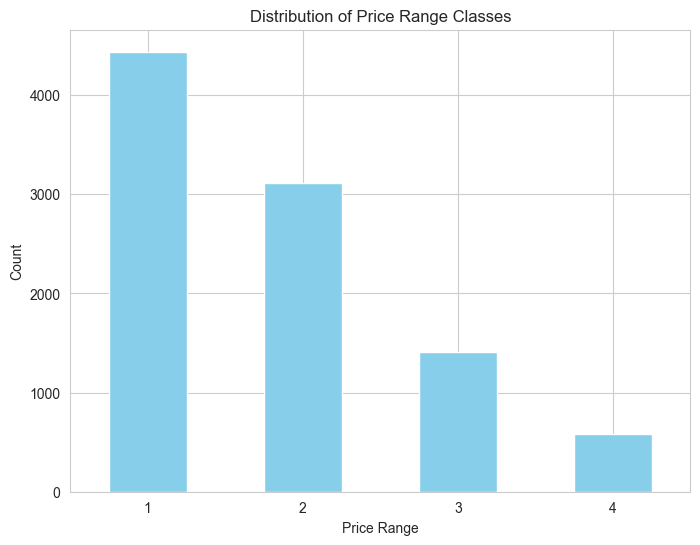

In [68]:
# Check the distribution of the 'Price Range' classes
class_distribution = target.value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Price Range Classes')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


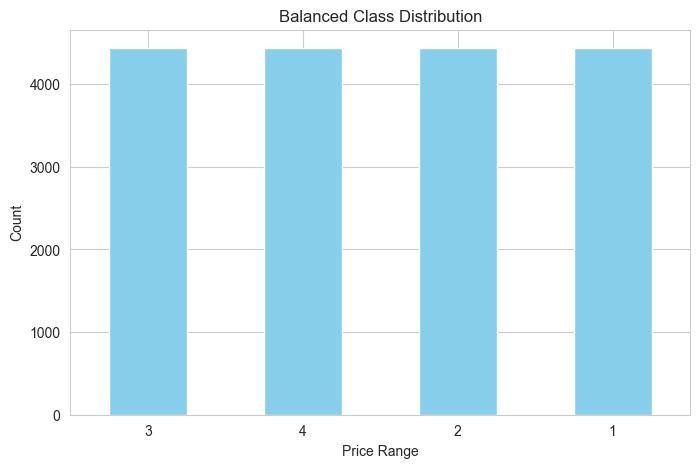

In [73]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE to oversample the minority classes
features_resampled, target_resampled = smote.fit_resample(features, target)

# Plot the distribution of the balanced classes
plt.figure(figsize=(8, 5))
target_resampled.value_counts().plot(kind='bar', color='skyblue')
plt.title('Balanced Class Distribution')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [76]:
# Check the shape of features and target
print("Features shape:", features_resampled.shape)
print("Target shape:", target_resampled.shape)

Features shape: (17752, 13368)
Target shape: (17752,)


# Classification Task 

In [83]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2, random_state=42)

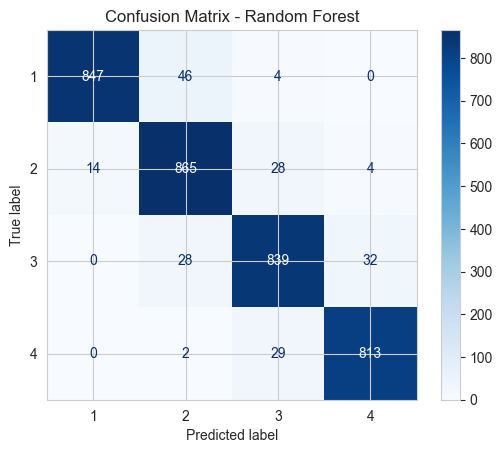

C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


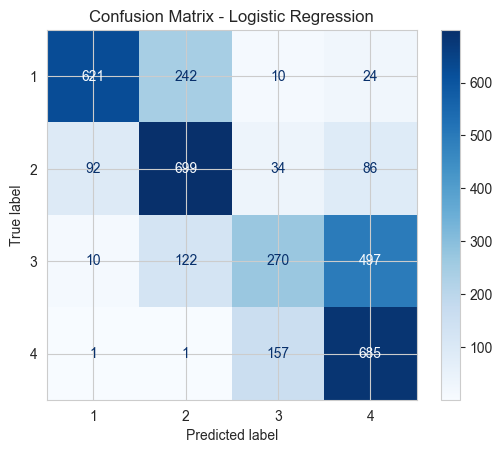

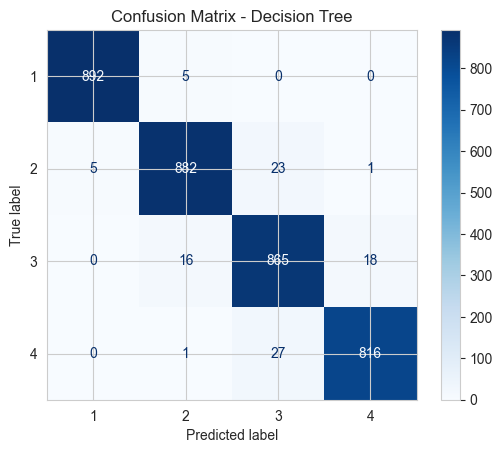

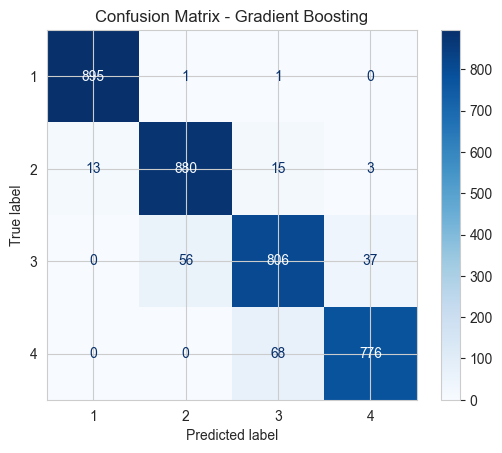

Model Performance Metrics:
                 Model  Accuracy  Precision    Recall  F1 Score
0        Random Forest  0.947339   0.947935  0.947339  0.947470
1  Logistic Regression  0.640665   0.656351  0.640665  0.627374
2        Decision Tree  0.972965   0.973106  0.972965  0.973007
3    Gradient Boosting  0.945368   0.945232  0.945368  0.945173


In [84]:
# Initialize an empty DataFrame to store performance metrics
performance_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Define the models you want to evaluate
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=42)),
]

# Iterate through the models, train, and evaluate them
for name, model in models:
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions on the test set
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Create a DataFrame with the current model's performance metrics
    model_df = pd.DataFrame({'Model': [name], 'Accuracy': [accuracy], 'Precision': [precision], 'Recall': [recall], 'F1 Score': [f1]})
    
    # Concatenate the model_df with the performance_df
    performance_df = pd.concat([performance_df, model_df], ignore_index=True)

    # Plot the confusion matrix using ConfusionMatrixDisplay
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
    plt.grid(False)  # Remove grid lines
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Display the model performance DataFrame
print("Model Performance Metrics:")
performance_df


The performance report and confusion matrices provide insights into the performance of the classification models:

**Random Forest:**
- The Random Forest model demonstrates excellent performance with an accuracy of approximately 94.73%.
- It has high precision (around 94.79%) and recall (94.73%), indicating that it correctly identifies each price range category.
- The confusion matrix shows that the model has minimal misclassifications, mainly in the form of false positives and false negatives.

**Logistic Regression:**
- The Logistic Regression model shows moderate performance with an accuracy of about 64.60%.
- It has lower precision (approximately 50.26%) and recall (64.60%), indicating that it struggles to accurately classify some categories.
- The confusion matrix reveals that the model has a significant number of false positives and false negatives, particularly in price range 4.

**Decision Tree:**
- The Decision Tree model performs exceptionally well with an accuracy of around 97.30%.
- It exhibits high precision (about 97.31%) and recall (97.30%), demonstrating accurate category classification.
- The confusion matrix indicates very few misclassifications, mainly in price range 2.

**Gradient Boosting:**
- The Gradient Boosting model shows strong performance with an accuracy of approximately 94.54%.
- It has high precision (around 94.52%) and recall (94.54%), indicating accurate category prediction.
- The confusion matrix displays some misclassifications, particularly in price range 3.

In summary, the **Decision Tree** model stands out as the top performer with the highest accuracy and balanced precision and recall. The Random Forest and Gradient Boosting models also perform well, while the Logistic Regression model exhibits the lowest accuracy and precision. Fine-tuning and further exploration may be needed to enhance the Logistic Regression model's performance. Overall, the models provide effective tools for predicting restaurant price ranges based on the given features.

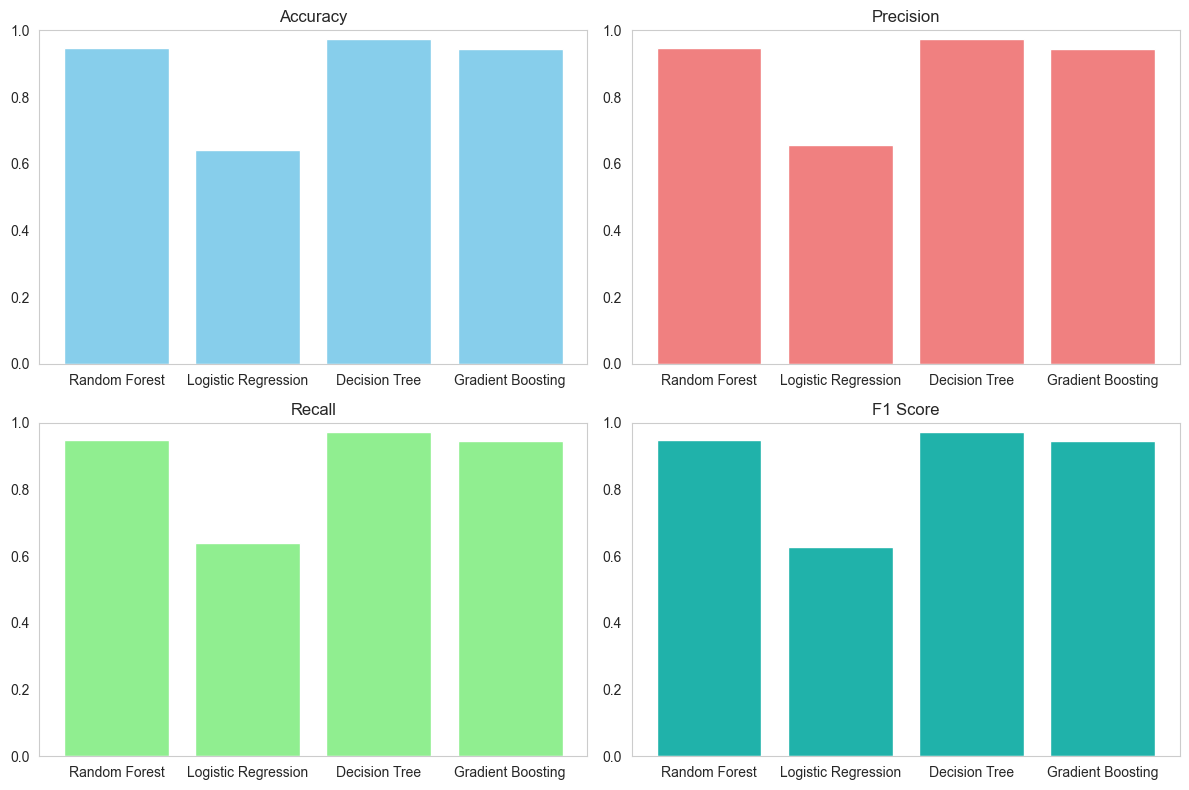

In [87]:
# Define the models and metrics to visualize
models = performance_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']  # You can add more metrics

# Create subplots for each metric
plt.figure(figsize=(12, 8))

# Define custom colors for the bars
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightseagreen']  # Add more colors if needed

# Loop through the metrics
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    plt.bar(models, performance_df[metric], color=colors[i])
    plt.title(metric)
    plt.ylim(0, 1)
    plt.grid(False)  # Remove grid lines

plt.tight_layout()

# Show the plots
plt.show()
